In [2]:
!pip install tensorflow  
!pip install opencv-python matplotlib
!pip install resource

# remove bad images

In [ ]:
import cv2
import imghdr
import os
data_dir =""
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}',image_path)
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}',image_path)
            # os.remove(image_path)

# load the data 

Found 15445 files belonging to 2 classes.
2


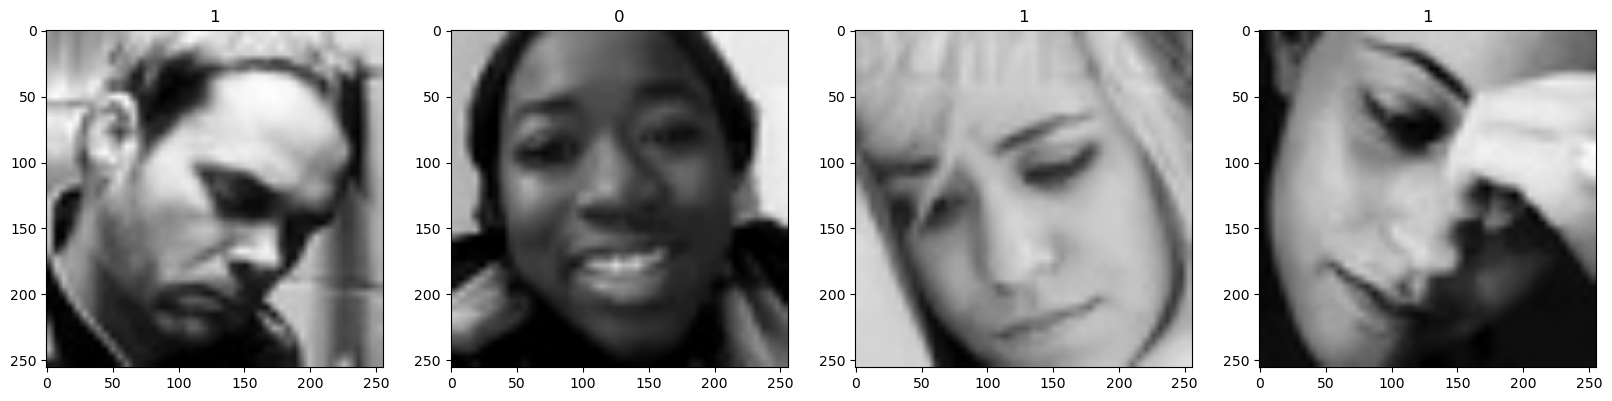

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory("")
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
print(len(batch))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# the ML model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from matplotlib import pyplot as plt
import numpy

# Load the training data
data = tf.keras.utils.image_dataset_from_directory(
    r"",
    image_size=(256, 256),
    batch_size=16,seed=1667
)

#scale the data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

#Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



# Build the image classification model
model = Sequential()

# Add a convolutional layer with 16 filters and a kernel size of 3x3
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 3)))

# Add a max pooling layer 
model.add(MaxPooling2D())

# Add another convolutional layer with 32 filters and a kernel size of 3x3
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# Add another max pooling layer 
model.add(MaxPooling2D())

# Add another convolutional layer with 16 filters and a kernel size of 3x3
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# Add another max pooling layer 
model.add(MaxPooling2D())

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a dense layer with 128 units
model.add(Dense(256, activation="relu"))

# Add the output layer with a sigmoid activation function
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])
# Evaluate the model 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result().numpy()) 

print(re.result().numpy()) 

print(acc.result().numpy())
model.save("image_1.h5")

Found 9000 files belonging to 2 classes.


AttributeError: 'function' object has no attribute 'fit'

# plot the accuracy

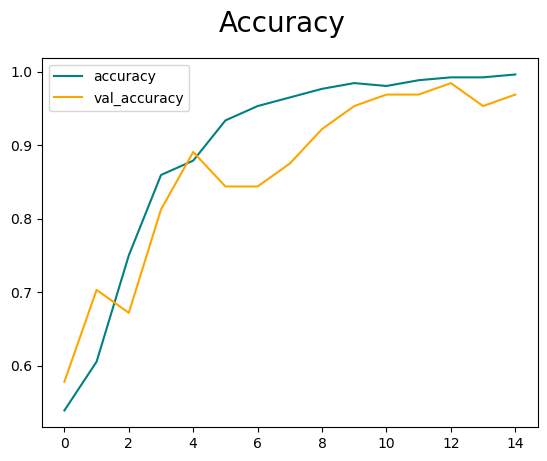

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# make a prediction

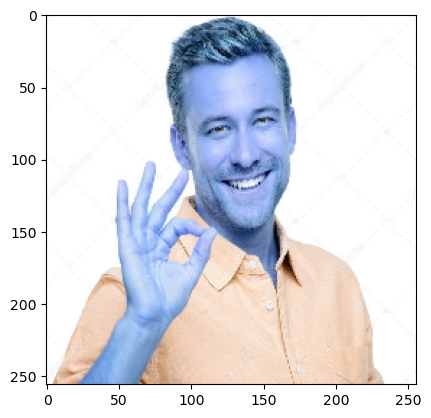

1/1 [==============================] - 0s 39ms/step
Predicted class is Happy


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
# enter pic
img = cv2.imread(r"")
# Check if the image was read successfully
if img is None:
    # The image was not read successfully
    print("Error: Image could not be read.")
    exit(1)
# Resize the image
resize = tf.image.resize(img, (256, 256))
# Plot the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()
# Print the predicted class
yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = numpy.argmax(yhat[0])
if yhat > 0.503:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')
    